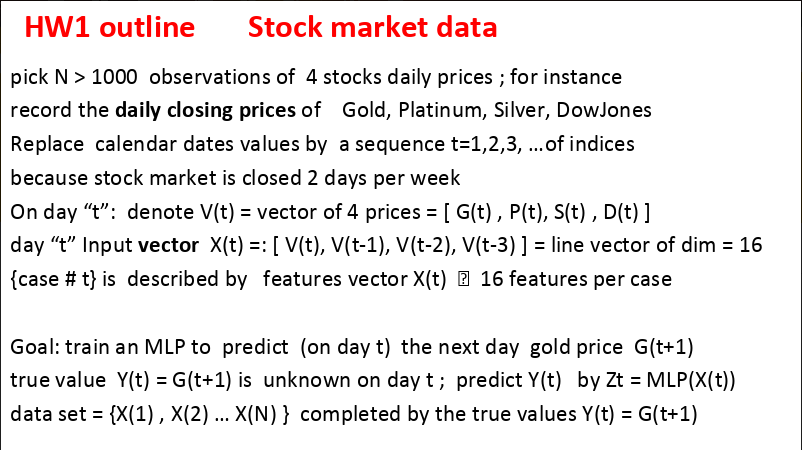

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import callbacks


sns.set_style('whitegrid')

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Math 6373 HW/HW1/formatted_stock_dataset.xlsx')

In [3]:
df.tail()

,Date,T,AMD(T-3),Intel(T-3),Nvidia(T-3),Micron(T-3),AMD(T-2),Intel(T-2),Nvidia(T-2),Micron(T-2),AMD(T-1),Intel(T-1),Nvidia(T-1),Micron(T-1),AMD(T),Intel(T),Nvidia(T),Micron(T),Y(T)
995,2021-01-14,996,90.790001,59.250000,528.010010,81.300003,88.209999,57.580002,514.380005,80.720001,89.449997,57.990002,521.010010,85.500000,88.750000,58.669998,534.630005,83.500000,91.529999
996,2021-01-15,997,88.209999,57.580002,514.380005,80.720001,89.449997,57.990002,521.010010,85.500000,88.750000,58.669998,534.630005,83.500000,91.529999,62.459999,554.700012,85.010002,92.790001
997,2021-01-19,998,89.449997,57.990002,521.010010,85.500000,88.750000,58.669998,534.630005,83.500000,91.529999,62.459999,554.700012,85.010002,92.790001,56.660000,548.500000,82.279999,94.129997
998,2021-01-20,999,88.750000,58.669998,534.630005,83.500000,91.529999,62.459999,554.700012,85.010002,92.790001,56.660000,548.500000,82.279999,94.129997,55.439999,546.130005,81.279999,94.709999
999,2021-01-21,1000,91.529999,62.459999,554.700012,85.010002,92.790001,56.660000,548.500000,82.279999,94.129997,55.439999,546.130005,81.279999,94.709999,55.209999,537.409973,79.510002,88.839996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88e21ee1d0>,
      dtype=object)

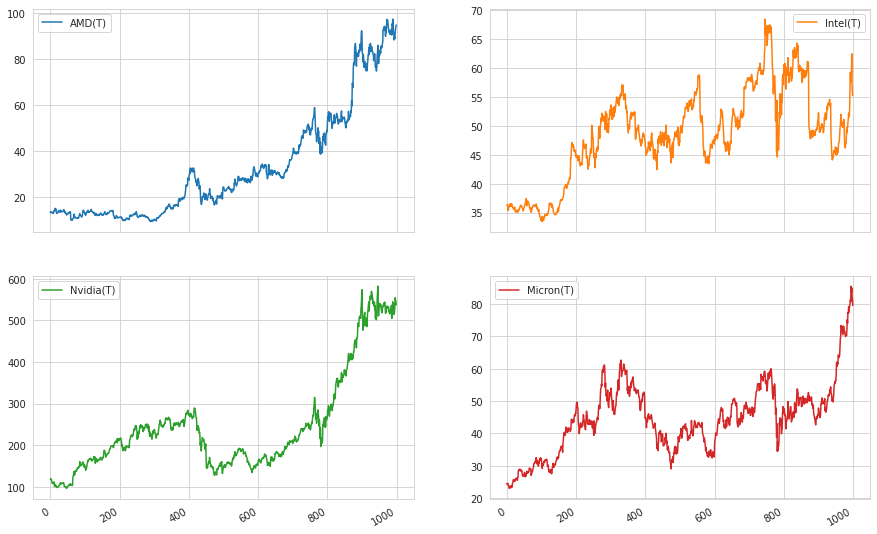

In [4]:
df.loc[:,'AMD(T)':'Micron(T)'].plot(subplots=True,layout=(2,2),figsize=(15,10))

In [5]:
# Correlation for Y(T) and other stock prices.
corr_df = df.loc[:,'AMD(T-3)':'Y(T)'].corr()
corr_df.loc['Y(T)',:].sort_values()

Intel(T)       0.457221
Intel(T-3)     0.457425
Intel(T-2)     0.457572
Intel(T-1)     0.457890
Micron(T-3)    0.585125
Micron(T-2)    0.588784
Micron(T-1)    0.592393
Micron(T)      0.595309
Nvidia(T-3)    0.874766
Nvidia(T-2)    0.876366
Nvidia(T-1)    0.878192
Nvidia(T)      0.879787
AMD(T-3)       0.994346
AMD(T-2)       0.995681
AMD(T-1)       0.997145
AMD(T)         0.998378
Y(T)           1.000000
Name: Y(T), dtype: float64

In [6]:
X = df.loc[:,'AMD(T-3)':'Micron(T)']
y = df['Y(T)']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Scaling
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

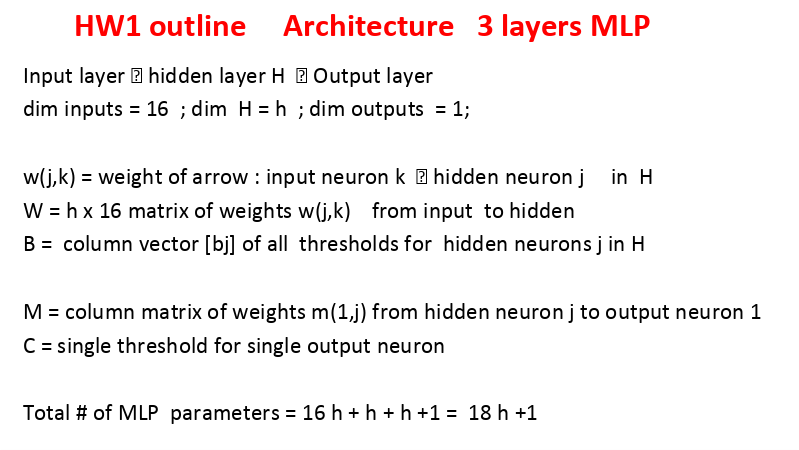

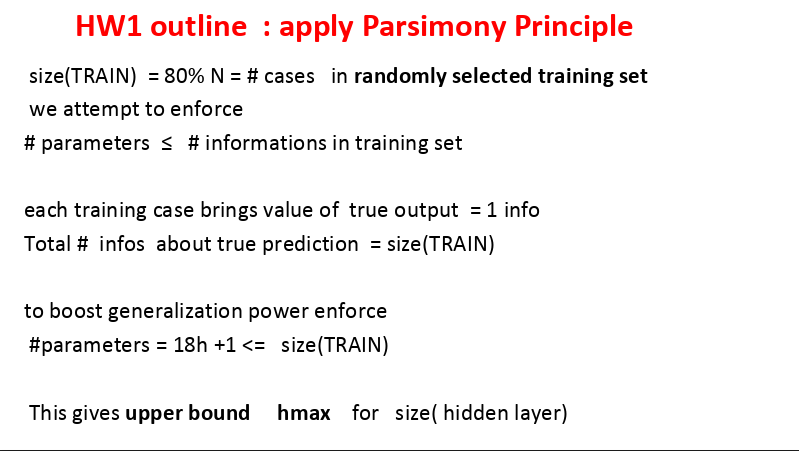

In [9]:
h_max = int((len(X_train) -1)/18)
h_max

44

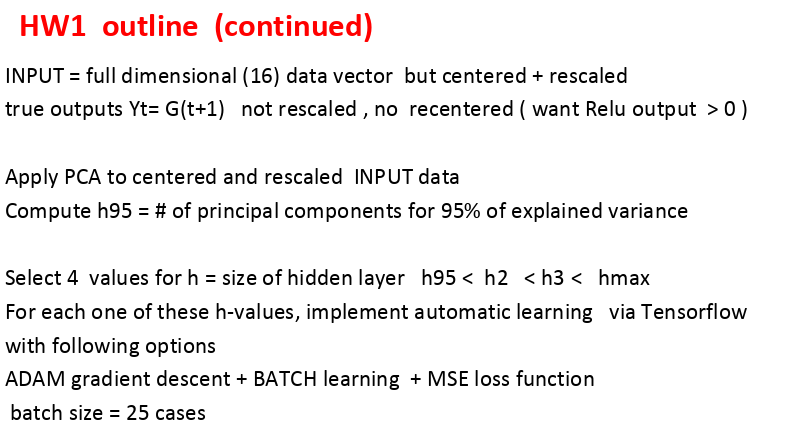

In [10]:
# PCA
pca = PCA(.95)
pca.fit(X_train_s)

X_train_s_PCA = pca.transform(X_train_s)

h95 = pca.n_components_
h95

3

In [11]:
# 3 to 44
h_neurons = list(range(h95,h_max+1,int((h_max-h95) / 4)))

batches = 25

h_neurons.remove(33)

h_neurons, batches

([3, 13, 23, 43], 25)

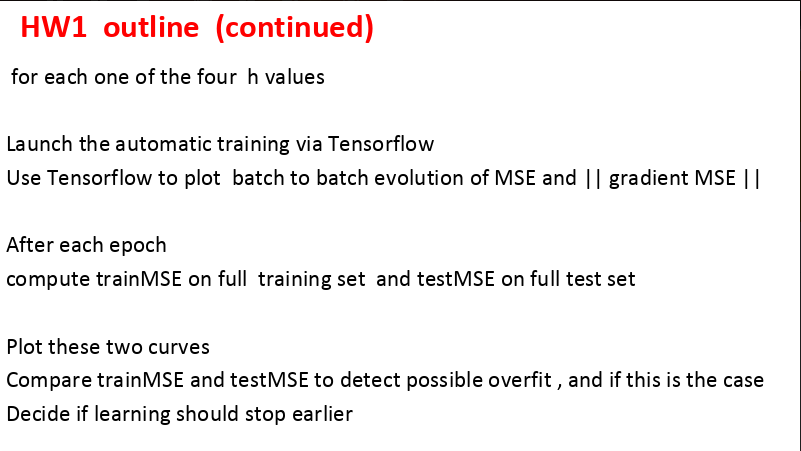

## 3 Neurons

In [12]:
loss_fn = losses.MeanSquaredError()
optimizer_adam = optimizers.Adam(learning_rate=.01)

In [13]:
class History(callbacks.Callback):
  def on_train_begin(self,logs=None):
    self.batch_gradient = []
    self.batch_gradient_norm = []
    self.epoch_train_loss = []
    self.epoch_test_loss = []
  def on_batch_end(self,batch,logs=None):
    with tf.GradientTape() as tape:
      y_pred = model(X_train_s)
      loss_val = loss_fn(y_train,y_pred)
    grad = tape.gradient(loss_val, model.trainable_variables)
    self.batch_gradient.append(loss_val.numpy())
    self.batch_gradient_norm.append(np.sqrt(sum([np.sum(np.square(g.numpy())) for g in grad])))
  def on_epoch_end(self,epoch,logs=None):
    train_loss_val = model.evaluate(X_train_s,y_train)
    self.epoch_train_loss.append(train_loss_val)
    test_loss_val = model.evaluate(X_test_s,y_test)
    self.epoch_test_loss.append(test_loss_val)
  
  # model_weights = []
    # for layer in model.layers:
    #     layer_weights = []
    #       for weight in layer.get_weights():
    #             layer_weights = np.concatenate([layer_weights,weight.flatten()])
    #             model_weights = np.concatenate([model_weights,layer_weights])
    #             self.weights.append(model_weights)
    




In [14]:
# Model Architecture
model = Sequential()

model.add(Dense(h_neurons[2], activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=optimizer_adam,loss=loss_fn)

checkpointer = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only = True)

grad_loss = History()

MLP_model = model.fit(X_train_s,y_train,epochs=50,batch_size=25,validation_data=(X_test_s,y_test), callbacks=[grad_loss,checkpointer])

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 1450.7262
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 259.8929
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 134.0780
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 101.7651
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 74.6602
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 54.3155
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 36.8723
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 26.0566
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 19.1655
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 14.1732
Epoch 11/50
7/7 [==============================] - 0s 3ms/step - loss: 11.7215
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 9.7475
Epoch 13/50
7/7 [==============================] - 0s 2ms

In [15]:
# plotting trainMSE and testMSE
epoch_dfs = []
epoch_df1= pd.DataFrame({'trainMSE_loss':grad_loss.epoch_train_loss,
                        'testMSE_loss':grad_loss.epoch_test_loss})

epoch_dfs.append(epoch_df1)

In [16]:
# plotting batch_gradient and batch_gradient_norm
batch_dfs = []
batch_df1 = pd.DataFrame({'batch_loss':grad_loss.batch_gradient,
                         'batch_gradient_norm':grad_loss.batch_gradient_norm})
batch_dfs.append(batch_df1)

In [17]:
# loading best model using 3 neurons
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

print(best_model.evaluate(X_train_s,y_train))
print(best_model.evaluate(X_test_s, y_test))

25/25 [==============================] - 0s 917us/step - loss: 2.2727
2.2726662158966064
7/7 [==============================] - 0s 2ms/step - loss: 2.6452
2.6452317237854004


## 13 Neurons

In [18]:
# Model Architecture
model = Sequential()

model.add(Dense(h_neurons[1], activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=optimizer_adam,loss=loss_fn)

checkpointer = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only = True)

grad_loss = History()

MLP_model = model.fit(X_train_s,y_train,epochs=50,batch_size=25,validation_data=(X_test_s,y_test), callbacks=[grad_loss,checkpointer])

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 234.9929
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 87.9026
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 56.8440
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 34.2903
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 19.9533
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 10.4703
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 7.5586
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 4.9245
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 5.0403
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 4.1169
Epoch 11/50
7/7 [==============================] - 0s 2ms/step - loss: 4.2621
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 4.1217
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - l

In [19]:
# plotting trainMSE and testMSE
epoch_df2= pd.DataFrame({'trainMSE_loss':grad_loss.epoch_train_loss,
                        'testMSE_loss':grad_loss.epoch_test_loss})

epoch_dfs.append(epoch_df2)

In [20]:
# plotting batch_gradient and batch_gradient_norm
batch_df2 = pd.DataFrame({'batch_loss':grad_loss.batch_gradient,
                         'batch_gradient_norm':grad_loss.batch_gradient_norm})

batch_dfs.append(batch_df2)

In [21]:
# loading best model using 3 neurons
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

print(best_model.evaluate(X_train_s,y_train))
print(best_model.evaluate(X_test_s, y_test))

25/25 [==============================] - 0s 1ms/step - loss: 2.1010
2.100959062576294
7/7 [==============================] - 0s 2ms/step - loss: 2.3958
2.3958165645599365


## 23 Neurons

In [22]:
# Model Architecture
model = Sequential()

model.add(Dense(h_neurons[2], activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=optimizer_adam,loss=loss_fn)

checkpointer = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only = True)

grad_loss = History()

MLP_model = model.fit(X_train_s,y_train,epochs=50,batch_size=25,validation_data=(X_test_s,y_test), callbacks=[grad_loss,checkpointer])

Epoch 1/50
7/7 [==============================] - 0s 2ms/step - loss: 176.1561
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 66.3179
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 28.3366
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 11.8016
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 8.9276
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 6.6877
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 7.1703
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 5.2997
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 4.8093
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 3.6877
Epoch 11/50
7/7 [==============================] - 0s 2ms/step - loss: 4.0420
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 3.2025
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - los

In [23]:
# plotting trainMSE and testMSE
epoch_df3= pd.DataFrame({'trainMSE_loss':grad_loss.epoch_train_loss,
                        'testMSE_loss':grad_loss.epoch_test_loss})

epoch_dfs.append(epoch_df3)

In [24]:
# plotting batch_gradient and batch_gradient_norm
batch_df3 = pd.DataFrame({'batch_loss':grad_loss.batch_gradient,
                         'batch_gradient_norm':grad_loss.batch_gradient_norm})

batch_dfs.append(batch_df3)

In [25]:
# loading best model using 3 neurons
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

print(best_model.evaluate(X_train_s,y_train))
print(best_model.evaluate(X_test_s, y_test))

25/25 [==============================] - 0s 1ms/step - loss: 1.9092
1.909210205078125
7/7 [==============================] - 0s 2ms/step - loss: 2.2635
2.2634963989257812


## 43 Neurons

In [26]:
# Model Architecture
model = Sequential()

model.add(Dense(h_neurons[3], activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=optimizer_adam,loss=loss_fn)

checkpointer = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only = True)

grad_loss = History()

MLP_model = model.fit(X_train_s,y_train,epochs=50,batch_size=25,validation_data=(X_test_s,y_test), callbacks=[grad_loss,checkpointer])

Epoch 1/50
7/7 [==============================] - 0s 3ms/step - loss: 104.7302
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 27.9095
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 11.2409
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 7.9533
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 5.3301
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 5.2231
Epoch 7/50
7/7 [==============================] - 0s 5ms/step - loss: 3.8440
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 3.5279
Epoch 9/50
7/7 [==============================] - 0s 2ms/step - loss: 3.2286
Epoch 10/50
7/7 [==============================] - 0s 2ms/step - loss: 3.5635
Epoch 11/50
7/7 [==============================] - 0s 2ms/step - loss: 4.3602
Epoch 12/50
7/7 [==============================] - 0s 2ms/step - loss: 3.7882
Epoch 13/50
7/7 [==============================] - 0s 2ms/step - loss

In [27]:
# plotting trainMSE and testMSE
epoch_df4= pd.DataFrame({'trainMSE_loss':grad_loss.epoch_train_loss,
                        'testMSE_loss':grad_loss.epoch_test_loss})

epoch_dfs.append(epoch_df4)

In [28]:
# plotting batch_gradient and batch_gradient_norm
batch_df4 = pd.DataFrame({'batch_loss':grad_loss.batch_gradient,
                         'batch_gradient_norm':grad_loss.batch_gradient_norm})

batch_dfs.append(batch_df4)

In [29]:
# loading best model using 3 neurons
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

print(best_model.evaluate(X_train_s,y_train))
print(best_model.evaluate(X_test_s, y_test))

25/25 [==============================] - 0s 1ms/step - loss: 1.8844
1.8843836784362793
7/7 [==============================] - 0s 2ms/step - loss: 2.1448
2.144813060760498


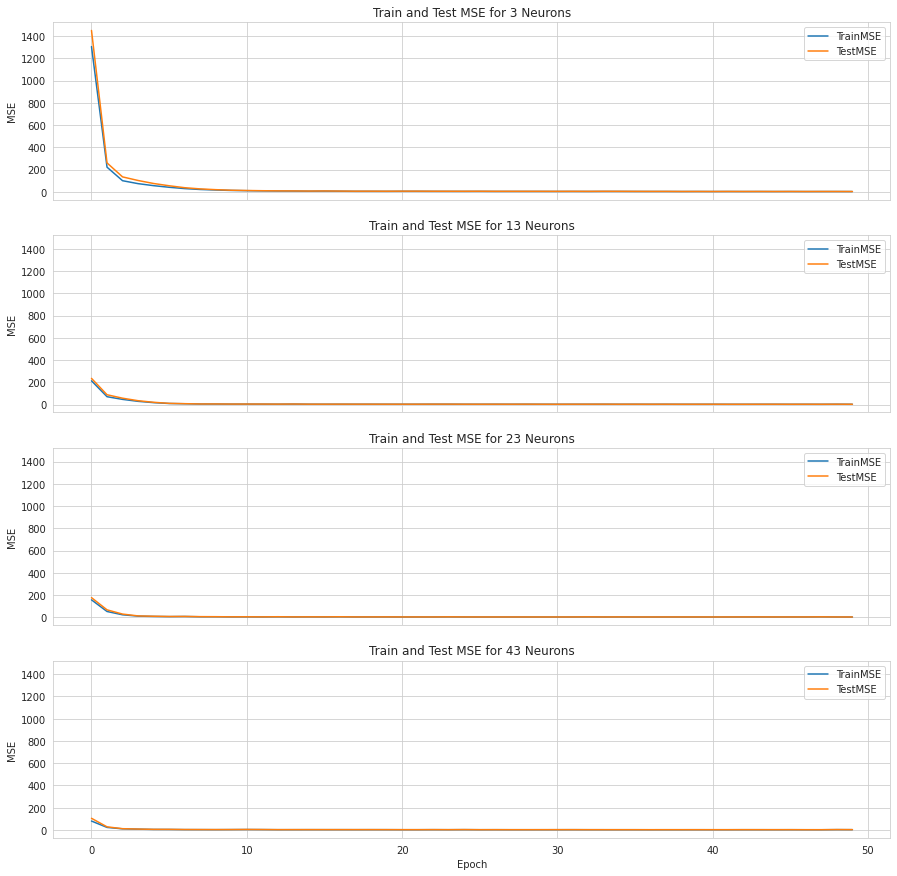

In [30]:
fig, axes = plt.subplots(nrows=len(epoch_dfs), sharey=True, sharex=True, figsize=(15,15))

for i in range(0,len(epoch_dfs)):
  sns.lineplot(x=epoch_dfs[i].index,
               y=epoch_dfs[i].trainMSE_loss,
               ax=axes[i])
  sns.lineplot(x=epoch_dfs[i].index,
               y=epoch_dfs[i].testMSE_loss,
               ax=axes[i])
  
  axes[i].set_title('Train and Test MSE for %s Neurons' % h_neurons[i])
  axes[i].set_ylabel('MSE')
  axes[i].set_xlabel('Epoch')
  axes[i].legend(labels=['TrainMSE','TestMSE'])
#   plt.title('MSE For Train and Test Sets (13 Neurons)')
# plt.legend(['trainMSE_loss','testMSE_loss'])
# plt.ylabel('MSE')
# plt.xlabel('Epoch')

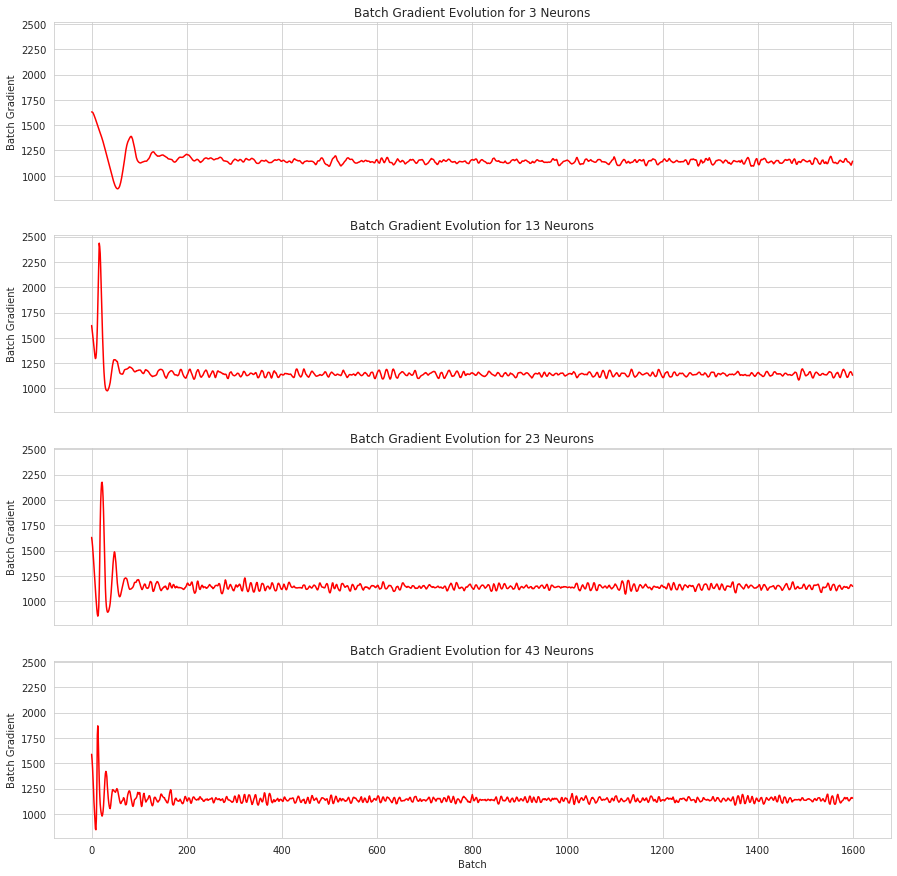

In [31]:
fig, axes = plt.subplots(nrows=len(batch_dfs), sharey=True, sharex=True, figsize=(15,15))

for i in range(0,len(batch_dfs)):
  sns.lineplot(x=batch_dfs[i].index,
               y=batch_dfs[i].batch_loss,
               ax=axes[i],
               color='red')
  
  axes[i].set_title('Batch Gradient Evolution for %s Neurons' % h_neurons[i])
  axes[i].set_ylabel('Batch Gradient')
  axes[i].set_xlabel('Batch')

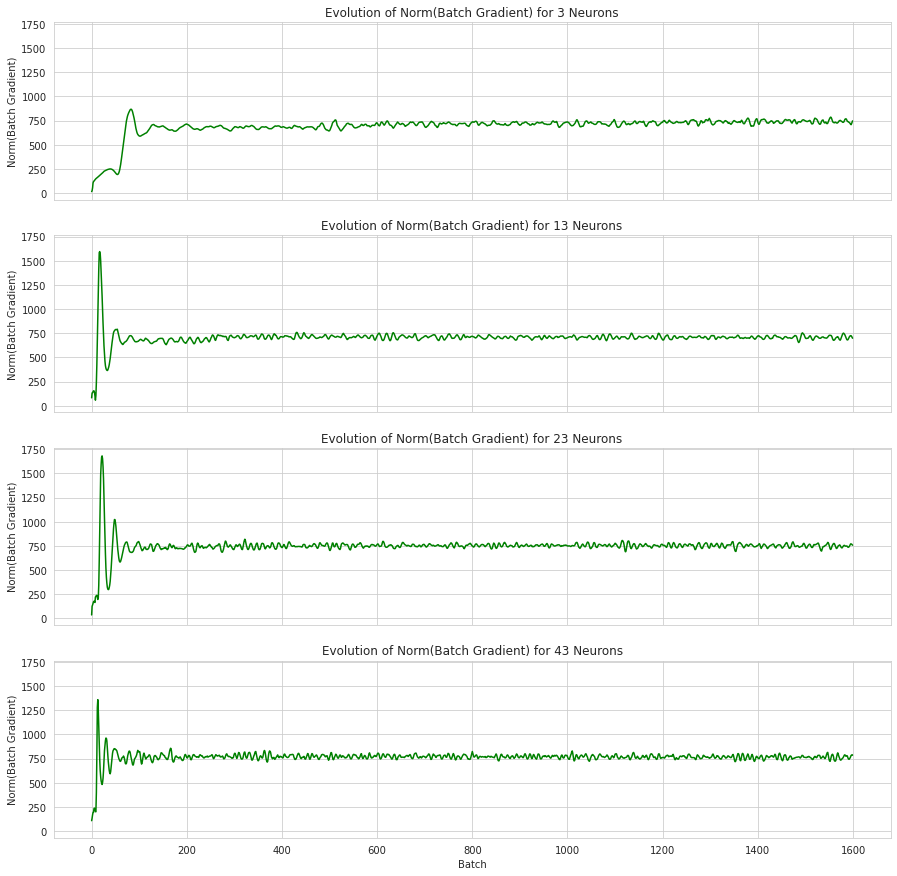

In [32]:
fig, axes = plt.subplots(nrows=len(batch_dfs), sharey=True, sharex=True, figsize=(15,15))

for i in range(0,len(batch_dfs)):
  sns.lineplot(x=batch_dfs[i].index,
               y=batch_dfs[i].batch_gradient_norm,
               ax=axes[i],
               color='green')
  
  axes[i].set_title('Evolution of Norm(Batch Gradient) for %s Neurons' % h_neurons[i])
  axes[i].set_ylabel('Norm(Batch Gradient)')
  axes[i].set_xlabel('Batch')

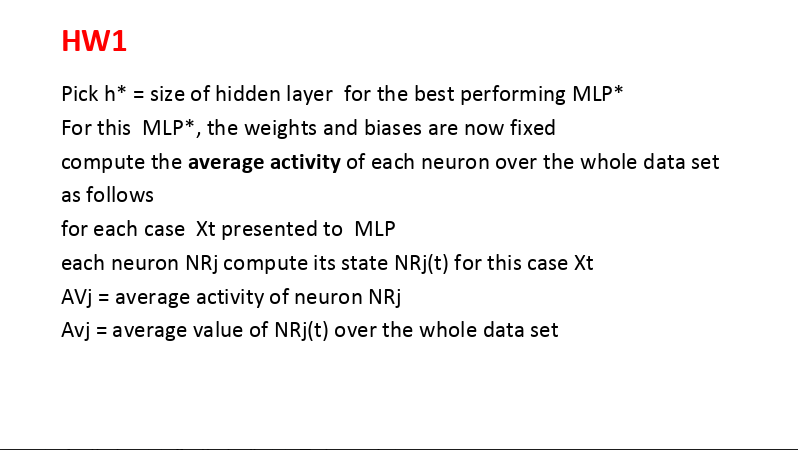

In [33]:
# Model Architecture
model = Sequential()

model.add(Dense(h_neurons[1], activation='relu', input_shape=(16,)))
model.add(Dense(1, activation='relu'))

model.compile(optimizer=optimizer_adam,loss=loss_fn)

checkpointer = callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only = True)

grad_loss = History()

MLP_model = model.fit(X_train_s,y_train,epochs=10,batch_size=25,validation_data=(X_test_s,y_test), callbacks=[grad_loss,checkpointer])

Epoch 1/10
7/7 [==============================] - 0s 2ms/step - loss: 141.0075
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 64.3299
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 32.5890
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 17.8053
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 12.0871
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 9.5669
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 7.5223
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 5.6030
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 5.7715
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 4.2402


Text(0.5, 0, 'Epoch')

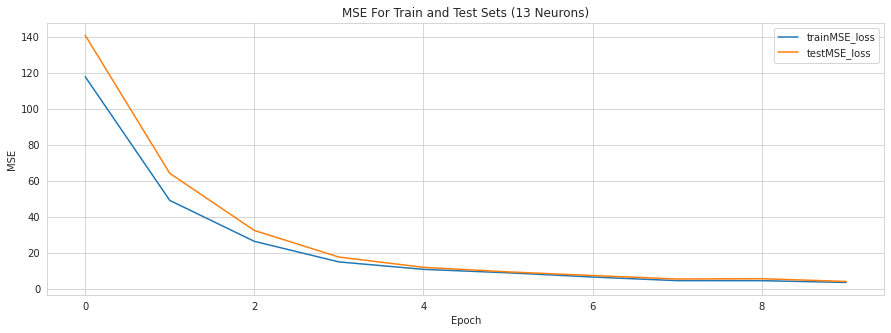

In [34]:
# plotting trainMSE and testMSE
epoch_df= pd.DataFrame({'trainMSE_loss':grad_loss.epoch_train_loss,
                        'testMSE_loss':grad_loss.epoch_test_loss})

fig = plt.subplots(figsize=(15,5))

sns.lineplot(x=epoch_df.index,y=epoch_df.trainMSE_loss)
sns.lineplot(x=epoch_df.index,y=epoch_df.testMSE_loss)

plt.title('MSE For Train and Test Sets (13 Neurons)')
plt.legend(['trainMSE_loss','testMSE_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')

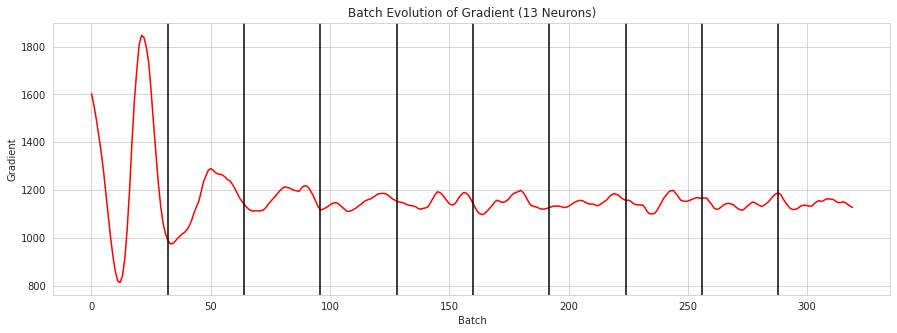

In [38]:
# plotting batch_gradient and batch_gradient_norm
batch_df = pd.DataFrame({'batch_loss':grad_loss.batch_gradient,
                         'batch_gradient_norm':grad_loss.batch_gradient_norm})

fig = plt.subplots(figsize=(15,5))

sns.lineplot(x=batch_df.index,y=batch_df.batch_loss,color='red')

plt.title('Batch Evolution of Gradient (13 Neurons)')
plt.ylabel('Gradient')
plt.xlabel('Batch')

for i in range(32,320,32):
  plt.axvline(i,color='black')

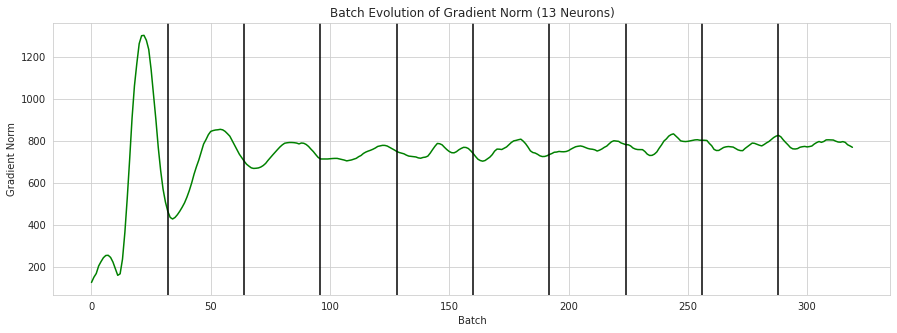

In [39]:
fig = plt.subplots(figsize=(15,5))

sns.lineplot(x=batch_df.index,y=batch_df.batch_gradient_norm,color='green')

plt.title('Batch Evolution of Gradient Norm (13 Neurons)')
plt.ylabel('Gradient Norm')
plt.xlabel('Batch')

for i in range(32,320,32):
  plt.axvline(i,color='black')

In [40]:
# loading best model using 13 neurons
# Restore the best model

from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

print(best_model.evaluate(X_train_s,y_train))
print(best_model.evaluate(X_test_s, y_test))

25/25 [==============================] - 0s 977us/step - loss: 3.6885
3.688505172729492
7/7 [==============================] - 0s 3ms/step - loss: 4.2402
4.240227222442627


In [41]:
X_s = pd.concat([pd.DataFrame(X_train_s),pd.DataFrame(X_test_s)])
y_s = pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_test)])

In [42]:
# From best model, input training cases and obtain activation states in each neuron in hidden layer
# note: this will give you numpy array (800, h*)
pd.DataFrame(best_model.layers[0](X_s.values).numpy()).mean()

0     1.456272
1     3.365965
2     5.207852
3     4.780764
4     3.121184
5     4.671879
6     0.447407
7     1.720626
8     1.787894
9     2.407567
10    3.461288
11    1.376860
12    1.538216
dtype: float32

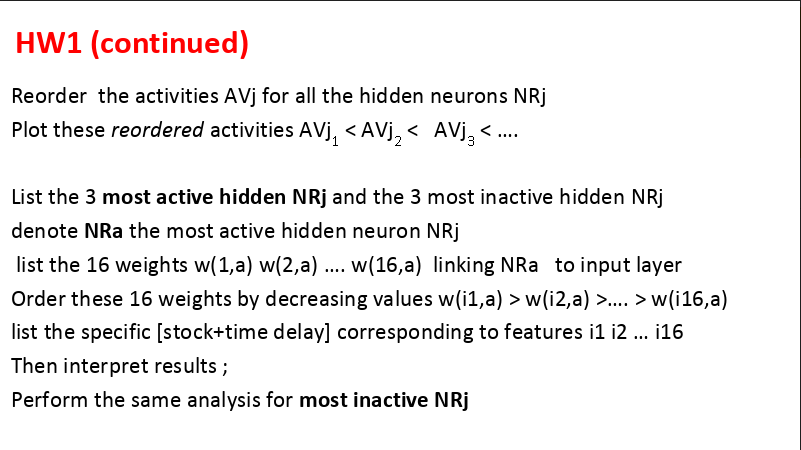

In [76]:
pd.DataFrame(best_model.layers[0](X_s.values).numpy()).mean().sort_values()

6     0.447407
11    1.376860
0     1.456272
12    1.538216
7     1.720626
8     1.787894
9     2.407567
4     3.121184
1     3.365965
10    3.461288
5     4.671879
3     4.780764
2     5.207852
dtype: float32

In [64]:
nra = pd.DataFrame(best_model.layers[0](X_s.values).numpy()).mean().sort_values()[-1:].index.values[0]

In [99]:
nra_weights=[]

for i in range(0,16):
  nra_weights.append(best_model.layers[0].get_weights()[0][i][nra])

nra_weights_df = pd.DataFrame({'average_activity':nra_weights})
nra_weights_df['actual_column'] = df.loc[:,'AMD(T-3)':'Micron(T)'].columns
nra_weights_df.sort_values('average_activity',ascending=False)

,average_activity,actual_column
0,1.429412,AMD(T-3)
10,1.299241,Nvidia(T-1)
2,1.273107,Nvidia(T-3)
8,1.161986,AMD(T-1)
12,1.108651,AMD(T)
6,1.077995,Nvidia(T-2)
14,0.946469,Nvidia(T)
4,0.877536,AMD(T-2)
7,0.639047,Micron(T-2)
5,0.494762,Intel(T-2)


In [94]:
nr = pd.DataFrame(best_model.layers[0](X_s.values).numpy()).mean().sort_values().index[0]

In [100]:
nr_weights=[]

for i in range(0,16):
  nr_weights.append(best_model.layers[0].get_weights()[0][i][nr])

nr_weights_df = pd.DataFrame({'average_activity':nr_weights})
nr_weights_df['actual_column'] = df.loc[:,'AMD(T-3)':'Micron(T)'].columns
nr_weights_df.sort_values('average_activity',ascending=False)

,average_activity,actual_column
5,0.759743,Intel(T-2)
9,0.626856,Intel(T-1)
1,0.415837,Intel(T-3)
8,0.393249,AMD(T-1)
13,0.392152,Intel(T)
11,0.250657,Micron(T-1)
6,0.148428,Nvidia(T-2)
0,0.029998,AMD(T-3)
12,0.023975,AMD(T)
3,-0.197701,Micron(T-3)
